In [1]:
import pandas as pd

# Load the core datasets
df_perf = pd.read_csv("202324_performance_tables_schools_final.csv")
df_info = pd.read_csv("202324_information_about_schools_final.csv")
df_inspect = pd.read_csv("Management_information_-_state-funded_schools_-_latest_inspections_-_as_at_31_Mar_2025.csv", encoding='ISO-8859-1')

# Preview shape and structure
print("Performance data shape:", df_perf.shape)
print("Info data shape:", df_info.shape)
print("Inspection data shape:", df_inspect.shape)

# Optional: preview top rows to ensure it loads properly
df_perf.head(2), df_info.head(2), df_inspect.head(2)


Performance data shape: (57090, 157)
Info data shape: (5709, 60)
Inspection data shape: (22008, 74)


/var/folders/td/4000g55n69dgnf646nfzz8hm0000gn/T/ipykernel_1522/1966368926.py:6: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_inspect = pd.read_csv("Management_information_-_state-funded_schools_-_latest_inspections_-_as_at_31_Mar_2025.csv", encoding='ISO-8859-1')


(   time_period time_identifier geographic_level country_code country_name  \
 0       202324   Academic year           School    E92000001      England   
 1       202324   Academic year           School    E92000001      England   
 
    school_laestab  school_urn         school_name  old_la_code new_la_code  \
 0         2016000      100544  David Game College          201   E09000001   
 1         2016000      100544  David Game College          201   E09000001   
 
    ... valan_ci_low valan_ci_upp t_ks4_e avg_ks4_e t_gcse_e avg_gcse_e  \
 0  ...            z            z      50         1       50          1   
 1  ...            z            z      22       0.8       22        0.8   
 
   t_volume_e avg_volume_e t_volume_covidimpacted_e pt_volume_covidimpacted_e  
 0         50            1                        0                         0  
 1         22          0.8                        0                         0  
 
 [2 rows x 157 columns],
    time_period time_identifier

In [2]:
# Check data types and nulls for a quick overview
print("\n--- Data Types and Nulls ---")
print("\nPerformance dataset:")
print(df_perf.info())
print("\nInfo dataset:")
print(df_info.info())
print("\nInspection dataset:")
print(df_inspect.info())


--- Data Types and Nulls ---

Performance dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57090 entries, 0 to 57089
Columns: 157 entries, time_period to pt_volume_covidimpacted_e
dtypes: int64(4), object(153)
memory usage: 68.4+ MB
None

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5709 entries, 0 to 5708
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   time_period               5709 non-null   int64 
 1   time_identifier           5709 non-null   object
 2   geographic_level          5709 non-null   object
 3   country_code              5709 non-null   object
 4   country_name              5709 non-null   object
 5   school_laestab            5709 non-null   int64 
 6   school_urn                5709 non-null   int64 
 7   school_name               5709 non-null   object
 8   old_la_code               5709 non-null   int64 
 9   new_la_code               5709

In [3]:
# See all columns and their data types
df_perf.dtypes


time_period                   int64
time_identifier              object
geographic_level             object
country_code                 object
country_name                 object
                              ...  
avg_gcse_e                   object
t_volume_e                   object
avg_volume_e                 object
t_volume_covidimpacted_e     object
pt_volume_covidimpacted_e    object
Length: 157, dtype: object

In [4]:
# Get a quick summary of column types
df_perf.dtypes.value_counts()


object    153
int64       4
Name: count, dtype: int64

In [5]:
# List all column names
df_perf.columns.tolist()


['time_period',
 'time_identifier',
 'geographic_level',
 'country_code',
 'country_name',
 'school_laestab',
 'school_urn',
 'school_name',
 'old_la_code',
 'new_la_code',
 'la_name',
 'version',
 'establishment_type_group',
 'breakdown_topic',
 'breakdown',
 'sex',
 'disadvantage',
 'first_language',
 'prior_attainment',
 'mobility',
 't_pupils',
 't_att8',
 'avg_att8',
 't_entbasics',
 'pt_entbasics',
 't_l2basics_95',
 'pt_l2basics_95',
 't_l2basics_94',
 'pt_l2basics_94',
 't_ebacc_e_ptq_ee',
 'pt_ebacc_e_ptq_ee',
 't_ebacc_95',
 'pt_ebacc_95',
 't_ebacc_94',
 'pt_ebacc_94',
 't_ebaccaps',
 'avg_ebaccaps',
 't_inp8calc',
 't_p8score',
 'avg_p8score',
 'p8score_ci_low',
 'p8score_ci_upp',
 't_p8eng',
 'avg_p8eng',
 'p8eng_ci_low',
 'p8eng_ci_upp',
 't_p8mat',
 'avg_p8mat',
 'p8mat_ci_low',
 'p8mat_ci_upp',
 't_p8ebac',
 'avg_p8ebac',
 'p8ebac_ci_low',
 'p8ebac_ci_upp',
 't_p8open',
 'avg_p8open',
 'p8open_ci_low',
 'p8open_ci_upp',
 't_anypass',
 'pt_anypass',
 't_ebaceng_e',
 'pt_

In [6]:
# Check for duplicate URNs (key identifier)
print("Duplicate URNs in performance data:", df_perf['school_urn'].duplicated().sum())
print("Duplicate URNs in info data:", df_info['school_urn'].duplicated().sum())
print("Duplicate URNs in inspection data:", df_inspect['URN at time of latest graded inspection'].duplicated().sum())

# Check for missing URNs (essential for merging)
print("Missing URNs in performance data:", df_perf['school_urn'].isnull().sum())
print("Missing URNs in info data:", df_info['school_urn'].isnull().sum())
print("Missing URNs in inspection data:", df_inspect['URN at time of latest graded inspection'].isnull().sum())



Duplicate URNs in performance data: 51381
Duplicate URNs in info data: 0
Duplicate URNs in inspection data: 159
Missing URNs in performance data: 0
Missing URNs in info data: 0
Missing URNs in inspection data: 160


In [7]:
# Filter to rows with non-null URNs and Ofsted ratings
df_inspect = df_inspect[
    df_inspect['URN at time of latest graded inspection'].notnull() &
    df_inspect['Overall effectiveness'].notnull()
]


# Rename URN column to school_urn for consistency across datasets
df_inspect = df_inspect.rename(columns={
    'URN at time of latest graded inspection': 'school_urn',
    'Overall effectiveness': 'ofsted_rating'
})

# Ensure all URNs are of the same type (int)
df_inspect['school_urn'] = df_inspect['school_urn'].astype(int)
df_info['school_urn'] = df_info['school_urn'].astype(int)
df_perf['school_urn'] = df_perf['school_urn'].astype(int)


In [8]:
# Ensure only 1 row per school is selected (total)
df_perf_new = df_perf[
    (df_perf['breakdown'] == 'Total') &
    (df_perf['sex'] == 'Total') &
    (df_perf['disadvantage'] == 'Total') &
    (df_perf['first_language'] == 'Total') &
    (df_perf['prior_attainment'] == 'Total') &
    (df_perf['mobility'] == 'Total')
]

In [9]:
# Check for duplicate URNs (key identifier)
print("Duplicate URNs in performance data:", df_perf_new['school_urn'].duplicated().sum())
print("Duplicate URNs in info data:", df_info['school_urn'].duplicated().sum())
print("Duplicate URNs in inspection data:", df_inspect['school_urn'].duplicated().sum())

# Check for missing URNs (essential for merging)
print("Missing URNs in performance data:", df_perf_new['school_urn'].isnull().sum())
print("Missing URNs in info data:", df_info['school_urn'].isnull().sum())
print("Missing URNs in inspection data:", df_inspect['school_urn'].isnull().sum())

Duplicate URNs in performance data: 0
Duplicate URNs in info data: 0
Duplicate URNs in inspection data: 0
Missing URNs in performance data: 0
Missing URNs in info data: 0
Missing URNs in inspection data: 0


In [10]:
# Merge performance and info datasets
df_merged = df_perf_new.merge(df_info, on='school_urn', how='left')

# Merge with inspection data (target variable: ofsted_rating)
df_merged = df_merged.merge(df_inspect, on='school_urn', how='left')

# Keep only rows with Ofsted rating (target)
df_merged = df_merged[df_merged['ofsted_rating'].notnull()]

# Report the shape of the final dataset
print("Final merged dataset shape:", df_merged.shape)


Final merged dataset shape: (3816, 289)


In [11]:
print(df_merged.columns.tolist())

['time_period_x', 'time_identifier_x', 'geographic_level_x', 'country_code_x', 'country_name_x', 'school_laestab_x', 'school_urn', 'school_name_x', 'old_la_code_x', 'new_la_code_x', 'la_name_x', 'version_x', 'establishment_type_group_x', 'breakdown_topic', 'breakdown', 'sex', 'disadvantage', 'first_language', 'prior_attainment', 'mobility', 't_pupils_x', 't_att8', 'avg_att8', 't_entbasics', 'pt_entbasics', 't_l2basics_95', 'pt_l2basics_95', 't_l2basics_94', 'pt_l2basics_94', 't_ebacc_e_ptq_ee', 'pt_ebacc_e_ptq_ee', 't_ebacc_95', 'pt_ebacc_95', 't_ebacc_94', 'pt_ebacc_94', 't_ebaccaps', 'avg_ebaccaps', 't_inp8calc', 't_p8score', 'avg_p8score', 'p8score_ci_low', 'p8score_ci_upp', 't_p8eng', 'avg_p8eng', 'p8eng_ci_low', 'p8eng_ci_upp', 't_p8mat', 'avg_p8mat', 'p8mat_ci_low', 'p8mat_ci_upp', 't_p8ebac', 'avg_p8ebac', 'p8ebac_ci_low', 'p8ebac_ci_upp', 't_p8open', 'avg_p8open', 'p8open_ci_low', 'p8open_ci_upp', 't_anypass', 'pt_anypass', 't_ebaceng_e', 'pt_ebaceng_e', 't_ebacmat_e', 'pt_ebac

In [12]:
# Select key features manually based on domain logic + past performance
selected_columns = [
    # Target variable
    'ofsted_rating',

    # Key Progress 8 & Attainment 8 indicators
    'avg_p8score',
    'avg_att8',
    'avg_p8ebac',
    'avg_p8eng',
    'avg_p8mat',
    'avg_p8open',
    'avg_ebaccaps',         
    'diffn_att8',         
    'diffn_p8mea', 

    # EBacc and core subject entry proportions
    'pt_entbasics',
    'pt_ebacc_e_ptq_ee',
    'pt_ebaceng_e', 'pt_ebacmat_e', 'pt_ebac2sci_e', 'pt_ebachum_e', 'pt_ebaclan_e',
    'pt_ebaceng_95', 'pt_ebacmat_95', 'pt_ebac2sci_95', 'pt_ebachum_95', 'pt_ebaclan_95',
    'pt_ebacc_95','pt_5em_94',

    # Subject-level attainment 8 scores
'avg_att8_eng', 'avg_att8_mat', 'avg_att8_ebac', 'avg_att8_open',
'avg_att8_open_g', 'avg_att8_open_ng',
'avg_ebac_fill', 'avg_open_fill',
'avg_gcse_e', 'avg_volume_e',



    # Student characteristics and demographics
    'pt_disadvantaged',
    'pt_language_not_english',
    'pt_language_unknown',
    'pt_not_mobile',


    # SEN (Special Educational Needs)
    'pt_sen_with_ehcp',
    'pt_sen_no_ehcp',
    'pt_sen',

    # Prior attainment at KS2
    'pt_prior_lo',
    'pt_prior_av',
    'pt_prior_hi',
    'avg_ks2_scaledscore',
    # Contextual features

'Faith grouping', 'The income deprivation affecting children index (IDACI) quintile',
'School type at time of latest graded inspection',

    # Historical Ofsted data
    'Previous graded inspection overall effectiveness',
    'Previous quality of education',
    'Previous behaviour and attitudes',
    'Previous personal development',
    'Previous effectiveness of leadership and management',
    'Previous safeguarding is effective?',
   
]

# Create new filtered DataFrame
df_final = df_merged[selected_columns].copy()

# Preview the shape and columns
print("Shape of final dataset:", df_final.shape)
print("Columns included:\n", df_final.columns.tolist())


Shape of final dataset: (3816, 54)
Columns included:
 ['ofsted_rating', 'avg_p8score', 'avg_att8', 'avg_p8ebac', 'avg_p8eng', 'avg_p8mat', 'avg_p8open', 'avg_ebaccaps', 'diffn_att8', 'diffn_p8mea', 'pt_entbasics', 'pt_ebacc_e_ptq_ee', 'pt_ebaceng_e', 'pt_ebacmat_e', 'pt_ebac2sci_e', 'pt_ebachum_e', 'pt_ebaclan_e', 'pt_ebaceng_95', 'pt_ebacmat_95', 'pt_ebac2sci_95', 'pt_ebachum_95', 'pt_ebaclan_95', 'pt_ebacc_95', 'pt_5em_94', 'avg_att8_eng', 'avg_att8_mat', 'avg_att8_ebac', 'avg_att8_open', 'avg_att8_open_g', 'avg_att8_open_ng', 'avg_ebac_fill', 'avg_open_fill', 'avg_gcse_e', 'avg_volume_e', 'pt_disadvantaged', 'pt_language_not_english', 'pt_language_unknown', 'pt_not_mobile', 'pt_sen_with_ehcp', 'pt_sen_no_ehcp', 'pt_sen', 'pt_prior_lo', 'pt_prior_av', 'pt_prior_hi', 'avg_ks2_scaledscore', 'Faith grouping', 'The income deprivation affecting children index (IDACI) quintile', 'School type at time of latest graded inspection', 'Previous graded inspection overall effectiveness', 'Previous

In [13]:
# Total missing values per column
missing_counts = df_final.isnull().sum()
print("Missing values per column:")
print(missing_counts[missing_counts > 0])


Missing values per column:
Previous graded inspection overall effectiveness       221
Previous quality of education                          221
Previous behaviour and attitudes                       221
Previous personal development                          221
Previous effectiveness of leadership and management    221
Previous safeguarding is effective?                    221
dtype: int64


In [14]:
# Percentage of missing values per column
missing_percent = (df_final.isnull().sum() / len(df_final)) * 100
print("Percentage of missing values:")
print(missing_percent[missing_percent > 0].sort_values(ascending=False))


Percentage of missing values:
Previous graded inspection overall effectiveness       5.791405
Previous quality of education                          5.791405
Previous behaviour and attitudes                       5.791405
Previous personal development                          5.791405
Previous effectiveness of leadership and management    5.791405
Previous safeguarding is effective?                    5.791405
dtype: float64


In [15]:
# Check data types
print(df_final.dtypes)

# Show columns that are not numeric (e.g., strings or mixed types)
non_numeric_columns = df_final.select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric columns:")
print(non_numeric_columns)


ofsted_rating                                                        object
avg_p8score                                                          object
avg_att8                                                             object
avg_p8ebac                                                           object
avg_p8eng                                                            object
avg_p8mat                                                            object
avg_p8open                                                           object
avg_ebaccaps                                                         object
diffn_att8                                                           object
diffn_p8mea                                                          object
pt_entbasics                                                         object
pt_ebacc_e_ptq_ee                                                    object
pt_ebaceng_e                                                         object
pt_ebacmat_e

In [16]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

for col in df_final.columns:
    print(f"\nColumn: {col} (dtype: {df_final[col].dtype})")
    print(df_final[col].value_counts(dropna=False).sort_index())




Column: ofsted_rating (dtype: object)
ofsted_rating
1              611
2             2409
3              370
4               61
Not judged     365
Name: count, dtype: int64

Column: avg_p8score (dtype: object)
avg_p8score
-0.01     20
-0.02     32
-0.03     20
-0.04     27
-0.05     23
-0.06     19
-0.07     26
-0.08     28
-0.09     20
-0.1      22
-0.11     16
-0.12     23
-0.13     40
-0.14     20
-0.15     18
-0.16     18
-0.17     30
-0.18     21
-0.19     26
-0.2      21
-0.21     24
-0.22     30
-0.23     21
-0.24     21
-0.25     17
-0.26     18
-0.27     25
-0.28     27
-0.29     28
-0.3      22
-0.31     18
-0.32     25
-0.33     16
-0.34     20
-0.35     18
-0.36     21
-0.37     20
-0.38     21
-0.39     20
-0.4      16
-0.41     20
-0.42     13
-0.43     16
-0.44     15
-0.45     12
-0.46     17
-0.47     18
-0.48     15
-0.49     12
-0.5      12
-0.51     14
-0.52     12
-0.53     14
-0.54     17
-0.55     16
-0.56     13
-0.57      9
-0.58     14
-0.59     12
-0.6      

In [17]:
for col in [
    'avg_p8score', 'avg_att8', 'avg_p8ebac', 'avg_p8eng', 'avg_p8mat', 'avg_p8open', 'avg_ebaccaps',
    'diffn_att8', 'diffn_p8mea',
    'pt_entbasics', 'pt_ebacc_e_ptq_ee',
    'pt_ebaceng_e', 'pt_ebacmat_e', 'pt_ebac2sci_e', 'pt_ebachum_e', 'pt_ebaclan_e',
    'pt_ebaceng_95', 'pt_ebacmat_95', 'pt_ebac2sci_95', 'pt_ebachum_95', 'pt_ebaclan_95',
    'pt_ebacc_95', 'pt_5em_94',
    'avg_att8_eng', 'avg_att8_mat', 'avg_att8_ebac', 'avg_att8_open',
    'avg_att8_open_g', 'avg_att8_open_ng',
    'avg_ebac_fill', 'avg_open_fill',
    'avg_gcse_e', 'avg_volume_e',
    'pt_disadvantaged', 'pt_language_not_english', 'pt_language_unknown',
    'pt_not_mobile', 'pt_sen_with_ehcp', 'pt_sen_no_ehcp', 'pt_sen',
    'pt_prior_lo', 'pt_prior_av', 'pt_prior_hi',
    'avg_ks2_scaledscore'
]:
    df_final[col] = pd.to_numeric(df_final[col], errors='coerce')



In [18]:
df_final['Previous safeguarding is effective?'] = (
    df_final['Previous safeguarding is effective?']
    .replace('9', 'Unknown')
    .fillna('Unknown')
)


In [19]:
cols_to_clean = [
    'Previous quality of education',
    'Previous behaviour and attitudes',
    'Previous personal development'
]

for col in cols_to_clean:
    df_final[col] = df_final[col].replace(9.0, pd.NA)


In [20]:
for col in cols_to_clean:
    df_final[col] = pd.to_numeric(df_final[col], errors='coerce')


In [21]:
# Remove 'Not judged' and convert remaining Ofsted ratings to integers
df_final = df_final[df_final['ofsted_rating'] != 'Not judged'].copy()
df_final['ofsted_rating'] = df_final['ofsted_rating'].astype(int)




In [22]:
# Show missing data
missing = df_final.isnull().sum()
print("Missing values per column:\n", missing[missing > 0])


Missing values per column:
 avg_p8score                                             400
avg_att8                                                385
avg_p8ebac                                              400
avg_p8eng                                               400
avg_p8mat                                               400
avg_p8open                                              400
avg_ebaccaps                                            385
diffn_att8                                              563
diffn_p8mea                                             581
pt_entbasics                                            385
pt_ebacc_e_ptq_ee                                       385
pt_ebaceng_e                                            385
pt_ebacmat_e                                            385
pt_ebac2sci_e                                           385
pt_ebachum_e                                            385
pt_ebaclan_e                                            385
pt_ebaceng_9

In [23]:
from sklearn.impute import SimpleImputer

# Identify numeric columns
num_cols = df_final.select_dtypes(include='number').columns

# Create imputer
num_imputer = SimpleImputer(strategy='median')

# Fit and transform
df_final[num_cols] = num_imputer.fit_transform(df_final[num_cols])


In [24]:
print("Remaining missing values:\n", df_final.isna().sum()[df_final.isna().sum() > 0])


Remaining missing values:
 Series([], dtype: int64)


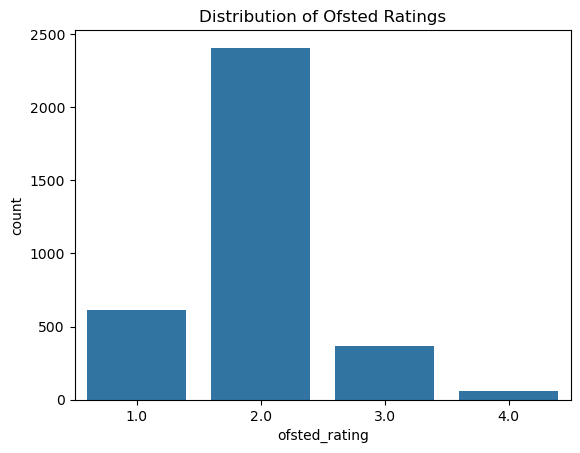

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='ofsted_rating', data=df_final)
plt.title("Distribution of Ofsted Ratings")
plt.show()


In [26]:
# Prepare features and target
X = df_final.drop('ofsted_rating', axis=1)

# Convert target to integers starting from 0 (required by XGBoost)
y = df_final['ofsted_rating'].astype(int) - 1

# Categorical features to encode
categorical_cols = [
    'Faith grouping',
    'School type at time of latest graded inspection',
    'Previous safeguarding is effective?'
]
# Fill missing values before encoding
X[categorical_cols] = X[categorical_cols].fillna('Unknown')
# All other columns are numeric
numeric_cols = X.drop(columns=categorical_cols).columns.tolist()


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)


In [28]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [29]:
!pip install lightgbm xgboost
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# Random Forest pipeline
pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# LightGBM pipeline
pipe_lgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(class_weight='balanced', random_state=42))
])

# XGBoost pipeline
pipe_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        objective='multi:softprob',  # Needed for multiclass
        num_class=4,                 # Set number of classes
        random_state=42
    ))
])


In [30]:
from sklearn.utils.class_weight import compute_sample_weight

# Compute class-balanced weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Fit XGBoost pipeline
pipe_xgb.fit(X_train, y_train, classifier__sample_weight=sample_weights)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Faith grouping',
                                                   'School type at time of '
                                                   'latest graded inspection',
                                                   'Previous safeguarding is '
                                                   'effective?']),
                                                 ('num', 'passthrough',
                                                  ['avg_p8score', 'avg_att8',
                                                   'avg_p8ebac', 'avg_p8eng',
                                                   'avg_p8mat', 'avg_p8open',
                                                   'avg_ebaccaps', 'diffn_att8',
                                                   '...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None, num_class=4, ...))])

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict with XGBoost
y_pred_xgb = pipe_xgb.predict(X_test)

print("=== XGBoost Test Set Evaluation ===")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


=== XGBoost Test Set Evaluation ===
[[ 74  48   0   0]
 [ 60 399  23   1]
 [  1  48  25   0]
 [  0   7   4   1]]
              precision    recall  f1-score   support

           0       0.55      0.61      0.58       122
           1       0.79      0.83      0.81       483
           2       0.48      0.34      0.40        74
           3       0.50      0.08      0.14        12

    accuracy                           0.72       691
   macro avg       0.58      0.46      0.48       691
weighted avg       0.71      0.72      0.71       691



In [32]:
from sklearn.model_selection import cross_val_score

def cross_validate_model(pipeline, model_name):
    scores = cross_val_score(
        pipeline, X_train, y_train,
        cv=5,
        scoring='f1_weighted'
    )
    print(f"\n===== {model_name} (5-Fold CV - F1 Weighted) =====")
    print(f"Scores: {scores}")
    print(f"Mean F1: {scores.mean():.4f} (+/- {scores.std():.4f})")

# Run CV for both models
cross_validate_model(pipe_rf, "Random Forest")
cross_validate_model(pipe_lgb, "LightGBM")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



===== Random Forest (5-Fold CV - F1 Weighted) =====
Scores: [0.64517139 0.66714059 0.68698877 0.66542128 0.67380644]
Mean F1: 0.6677 (+/- 0.0136)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8720
[LightGBM] [Info] Number of data points in the train set: 2208, number of used features: 65
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8725
[LightGBM] [Info] Number of data points in the train set: 2208, number of used

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8711
[LightGBM] [Info] Number of data points in the train set: 2208, number of used features: 65
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8710
[LightGBM] [Info] Number of data points in the train set: 2208, number of used features: 65
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start t

In [33]:
# Fit and predict with Random Forest
pipe_rf.fit(X_train, y_train)
y_pred_rf = pipe_rf.predict(X_test)

print("=== Random Forest Test Set Evaluation ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


# Fit and predict with LightGBM
pipe_lgb.fit(X_train, y_train)
y_pred_lgb = pipe_lgb.predict(X_test)

print("=== LightGBM Test Set Evaluation ===")
print(confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))


=== Random Forest Test Set Evaluation ===
[[ 58  64   0   0]
 [ 33 448   2   0]
 [  1  66   7   0]
 [  0  10   2   0]]
              precision    recall  f1-score   support

           0       0.63      0.48      0.54       122
           1       0.76      0.93      0.84       483
           2       0.64      0.09      0.16        74
           3       0.00      0.00      0.00        12

    accuracy                           0.74       691
   macro avg       0.51      0.37      0.39       691
weighted avg       0.71      0.74      0.70       691

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8878
[LightGBM] [Info] Number of data points in the train set: 2760, number of used features: 65
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


=== LightGBM Test Set Evaluation ===
[[ 75  47   0   0]
 [ 67 391  25   0]
 [  1  46  26   1]
 [  0  10   2   0]]
              precision    recall  f1-score   support

           0       0.52      0.61      0.57       122
           1       0.79      0.81      0.80       483
           2       0.49      0.35      0.41        74
           3       0.00      0.00      0.00        12

    accuracy                           0.71       691
   macro avg       0.45      0.44      0.44       691
weighted avg       0.70      0.71      0.70       691



In [34]:
from sklearn.model_selection import GridSearchCV

# LightGBM pipeline (reusing your existing preprocessor)
pipe_lgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(class_weight='balanced', random_state=42))
])

# Define LightGBM hyperparameter grid
param_grid_lgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10, -1],  # -1 = no limit
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__num_leaves': [15, 31, 63]
}

# GridSearchCV for LightGBM
grid_lgb = GridSearchCV(pipe_lgb, param_grid_lgb, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_lgb.fit(X_train, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8532
[LightGBM] [Info] Number of data points in the train set: 1840, number of used features: 64
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8532
[LightGBM] [Info] Number of data points in the train set: 1840, number of used features: 64
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008594 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8490
[LightGBM] [Info] Number of data points in the train set: 1840, number of used features: 64
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8532
[LightGBM] [Info] Number of data points in the train set: 1840, number of used features: 64
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8490
[LightGBM] [Info] Number of data points in the train set: 1840, number of used features: 64
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8878
[LightGBM] [Info] Number of data points in the train set: 2760, number of used features: 65
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Faith '
                                                                          'grouping',
                                                                          'School '
                                                                          'type '
                                                                          'at '
                                                                          'time '
                                                                          'of '
                                                                          'latest '
                                                                          'graded '
                                                                          'inspection',
                                                                          'Previous '
                                                                          'safeguarding '
                                                                          'is '
                                                                          'effective?']),
                                                                        ('num',
                                                                         'passthrough',
                                                                         ['avg_p8score',
                                                                          'avg_att8',
                                                                          'avg_p8ebac',
                                                                          'avg_p8eng',
                                                                          'avg_p8m...
                                                                          'avg_att8_open',
                                                                          'avg_att8_open_g',
                                                                          'avg_att8_open_ng',
                                                                          'avg_ebac_fill', ...])])),
                                       ('classifier',
                                        LGBMClassifier(class_weight='balanced',
                                                       random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.05, 0.1],
                         'classifier__max_depth': [5, 10, -1],
                         'classifier__n_estimators': [100, 200],
                         'classifier__num_leaves': [15, 31, 63]},
             scoring='f1_weighted', verbose=1)

In [35]:
print("Best LightGBM parameters:", grid_lgb.best_params_)
print("Best LightGBM CV F1 (weighted):", grid_lgb.best_score_)



Best LightGBM parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': -1, 'classifier__n_estimators': 200, 'classifier__num_leaves': 31}
Best LightGBM CV F1 (weighted): 0.6974549138808923


In [36]:
# XGBoost pipeline
pipe_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        objective='multi:softprob',
        num_class=4,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss'
    ))
])

# Define sample weights
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Define XGBoost hyperparameter grid
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 6, 10],
    'classifier__learning_rate': [0.05, 0.1],
    'classifier__subsample': [0.8, 1.0]
}

# GridSearchCV for XGBoost (with sample weights)
grid_xgb = GridSearchCV(pipe_xgb, param_grid_xgb, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)

# Fit with sample weights
grid_xgb.fit(X_train, y_train, classifier__sample_weight=sample_weights)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:56:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:56:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:56:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:56:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Faith '
                                                                          'grouping',
                                                                          'School '
                                                                          'type '
                                                                          'at '
                                                                          'time '
                                                                          'of '
                                                                          'latest '
                                                                          'graded '
                                                                          'inspection',
                                                                          'Previous '
                                                                          'safeguarding '
                                                                          'is '
                                                                          'effective?']),
                                                                        ('num',
                                                                         'passthrough',
                                                                         ['avg_p8score',
                                                                          'avg_att8',
                                                                          'avg_p8ebac',
                                                                          'avg_p8eng',
                                                                          'avg_p8m...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None, num_class=4, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.05, 0.1],
                         'classifier__max_depth': [3, 6, 10],
                         'classifier__n_estimators': [100, 200],
                         'classifier__subsample': [0.8, 1.0]},
             scoring='f1_weighted', verbose=1)

In [37]:
print("Best XGBoost parameters:", grid_xgb.best_params_)
print("Best XGBoost CV F1 (weighted):", grid_xgb.best_score_)


Best XGBoost parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 10, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
Best XGBoost CV F1 (weighted): 0.6919691560159013


In [38]:
best_lgb = grid_lgb.best_estimator_
best_xgb = grid_xgb.best_estimator_

# Predictions
y_pred_lgb = best_lgb.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)

# Classification reports
from sklearn.metrics import classification_report

print("=== LightGBM Tuned ===")
print(classification_report(y_test, y_pred_lgb))

print("=== XGBoost Tuned ===")
print(classification_report(y_test, y_pred_xgb))


=== LightGBM Tuned ===
              precision    recall  f1-score   support

           0       0.55      0.63      0.59       122
           1       0.80      0.82      0.81       483
           2       0.45      0.31      0.37        74
           3       0.00      0.00      0.00        12

    accuracy                           0.72       691
   macro avg       0.45      0.44      0.44       691
weighted avg       0.70      0.72      0.71       691

=== XGBoost Tuned ===
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       122
           1       0.80      0.84      0.82       483
           2       0.52      0.30      0.38        74
           3       0.25      0.17      0.20        12

    accuracy                           0.74       691
   macro avg       0.54      0.49      0.50       691
weighted avg       0.72      0.74      0.73       691



In [39]:
# === SMOTE Pipelines for LightGBM and XGBoost ===
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, confusion_matrix

# Best parameters from earlier tuning
best_lgb_params = {
    'learning_rate': 0.05,
    'max_depth': -1,
    'n_estimators': 200,
    'num_leaves': 31
}

best_xgb_params = {
    'learning_rate': 0.05,
    'max_depth': 10,
    'n_estimators': 200,
    'subsample': 0.8
}

# LightGBM pipeline with SMOTE
pipe_lgb_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LGBMClassifier(**best_lgb_params, class_weight='balanced', random_state=42))
])

# XGBoost pipeline with SMOTE
pipe_xgb_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(**best_xgb_params, objective='multi:softprob', num_class=4, random_state=42))
])

# === Fit and evaluate LightGBM + SMOTE ===
pipe_lgb_smote.fit(X_train, y_train)
y_pred_lgb_smote = pipe_lgb_smote.predict(X_test)
print("=== LightGBM + SMOTE ===")
print(confusion_matrix(y_test, y_pred_lgb_smote))
print(classification_report(y_test, y_pred_lgb_smote))

# === Fit and evaluate XGBoost + SMOTE ===
pipe_xgb_smote.fit(X_train, y_train)
y_pred_xgb_smote = pipe_xgb_smote.predict(X_test)
print("=== XGBoost + SMOTE ===")
print(confusion_matrix(y_test, y_pred_xgb_smote))
print(classification_report(y_test, y_pred_xgb_smote))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14991
[LightGBM] [Info] Number of data points in the train set: 7704, number of used features: 69
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
=== LightGBM + SMOTE ===
[[ 64  58   0   0]
 [ 40 434   9   0]
 [  1  54  17   2]
 [  0   9   3   0]]
              precision    recall  f1-score   support

           0       0.61      0.52      0.56       122
           1       0.78      0.90      0.84       483
           2       0.59      0.23      0.33        74
           3       0.00      0.00      0.00        12

    accuracy                           0.75       691
   macro avg       0.49      0.41      0.43       691
weighted avg 

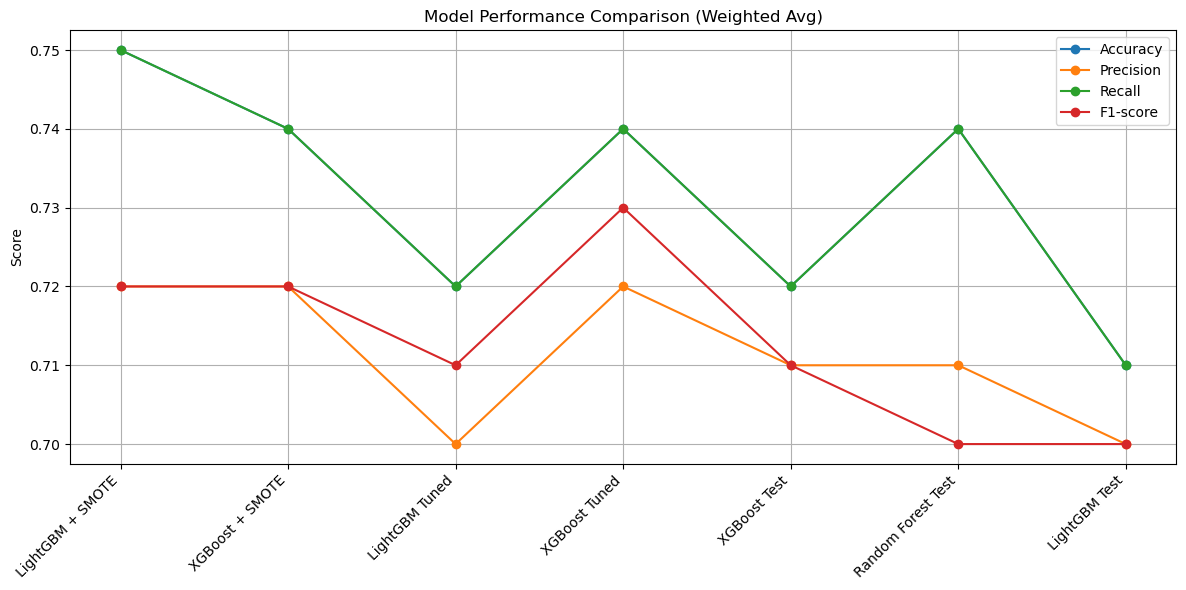

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame with model results
data = {
    'Model': [
        'LightGBM + SMOTE', 'XGBoost + SMOTE',
        'LightGBM Tuned', 'XGBoost Tuned',
        'XGBoost Test', 'Random Forest Test', 'LightGBM Test'
    ],
    'Accuracy': [0.75, 0.74, 0.72, 0.74, 0.72, 0.74, 0.71],
    'Precision': [0.72, 0.72, 0.70, 0.72, 0.71, 0.71, 0.70],
    'Recall': [0.75, 0.74, 0.72, 0.74, 0.72, 0.74, 0.71],
    'F1-score': [0.72, 0.72, 0.71, 0.73, 0.71, 0.70, 0.70]
}

df_compare = pd.DataFrame(data)

# Plotting line chart
plt.figure(figsize=(12, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

for metric in metrics:
    plt.plot(df_compare['Model'], df_compare[metric], marker='o', label=metric)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Score')
plt.title('Model Performance Comparison (Weighted Avg)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


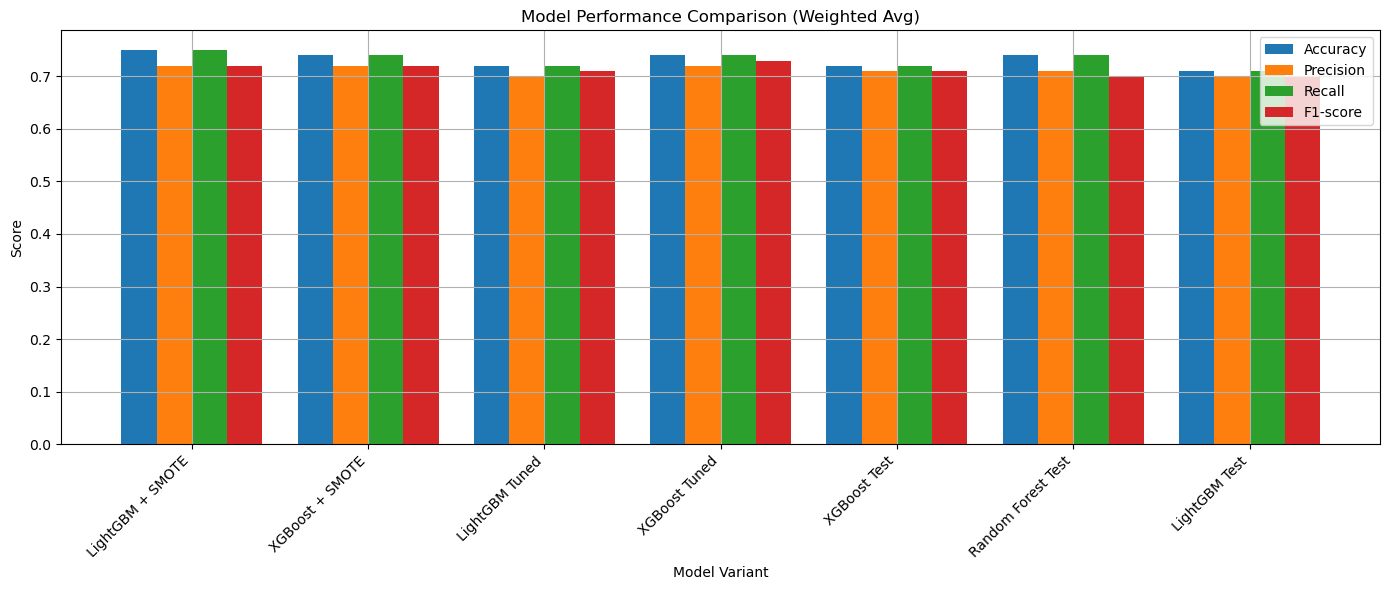

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Define metric categories and values for each model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
models = [
    'LightGBM + SMOTE', 'XGBoost + SMOTE',
    'LightGBM Tuned', 'XGBoost Tuned',
    'XGBoost Test', 'Random Forest Test', 'LightGBM Test'
]

# Scores in the order of [Accuracy, Precision, Recall, F1-score]
values = [
    [0.75, 0.72, 0.75, 0.72],
    [0.74, 0.72, 0.74, 0.72],
    [0.72, 0.70, 0.72, 0.71],
    [0.74, 0.72, 0.74, 0.73],
    [0.72, 0.71, 0.72, 0.71],
    [0.74, 0.71, 0.74, 0.70],
    [0.71, 0.70, 0.71, 0.70]
]

# Transpose the list so each sublist is a metric across all models
values = np.array(values).T

# Set bar positions
x = np.arange(len(models))
bar_width = 0.2

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
for i, metric in enumerate(metrics):
    plt.bar(x + i * bar_width, values[i], width=bar_width, label=metric)

plt.xlabel('Model Variant')
plt.ylabel('Score')
plt.title('Model Performance Comparison (Weighted Avg)')
plt.xticks(x + bar_width * 1.5, models, rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
